In [1]:
import numpy as np
import pandas as pd
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./SPAM textData.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

# Text cleaning and processing steps-
* Remove punctuations 刪除標點符號
* Convert text to tokens 將文字轉換為標記
* Remove tokens of length less than or equal to 3 刪除長度小於或等於3的token
* Remove stopwords using NLTK corpus stopwords list to match 使用NLTK語料庫停用詞列表刪除停用詞進行匹配
* Apply stemming 應用詞幹擷取
* Apply lemmatization 應用詞形還原
* Convert words to feature vectors 將單字轉換為特徵向量

In [4]:
# Remove all punctuations from the text

def remove_punct(text):
    return "".join([ch for ch in text if ch not in st.punctuation])

In [ ]:
data["removed_punc"] = data["Message"].apply(lambda x: remove_punct(x))
data.head()

,Category,Message,removed_punc
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [6]:
# 將文字轉換為小寫標記
def tokenize(text):
    text = re.split(r"\s+", text)
    return [x.lower() for x in text]

In [ ]:
data["tokens"] = data["removed_punc"].apply(lambda msg: tokenize(msg))
data.head()

,Category,Message,removed_punc,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [8]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3]

In [ ]:
data["larger_tokens"] = data["tokens"].apply(lambda x: remove_small_words(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]"


In [10]:
# 刪除停用字
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words("english")]

In [11]:
data["clean_tokens"] = data["larger_tokens"].apply(lambda x: remove_stopwords(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]"


In [12]:
# 套用詞幹擷取
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [13]:
data["stem_words"] = data["clean_tokens"].apply(lambda wrd: stemming(wrd))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]"


In [14]:
# Apply lemmatization on tokens 詞形還原
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [15]:
data["lemma_words"] = data["clean_tokens"].apply(lambda x: lemmatize(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]"


In [16]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
data["clean_text"] = data["lemma_words"].apply(lambda x: return_sentences(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]",dont think go life around though


In [18]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 825.8 kB/s eta 0:00:01
   --------------------- ------------------ 163.8/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00


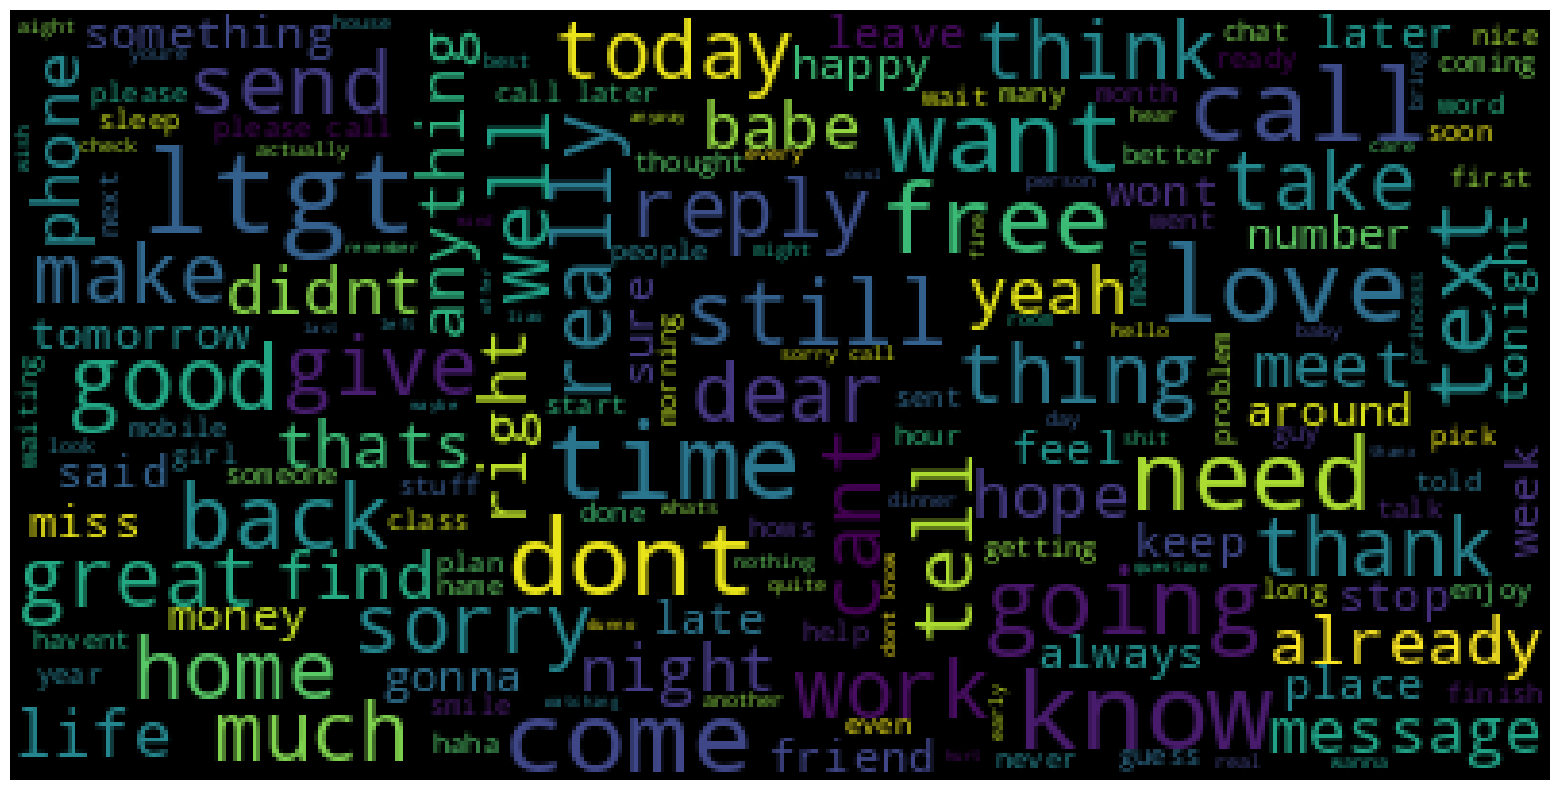

In [18]:
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data["clean_text"]])

wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
# Prepare data for the model. Convert label/category in to binary

data["Category"] = [1 if x == "spam" else 0 for x in data["Category"]]
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]",dont think go life around though


In [20]:
# Split data in to training, testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

text_train, text_test, y_train, y_test = train_test_split(
    data["clean_text"], data["Category"], test_size=0.2
)
print(text_train.shape)
print(text_test.shape)

(4457,)
(1115,)


In [21]:
# 將詞形還原後的單字轉換為 Tf-Idf 特徵向量
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(text_train)
X_test = tfidf.transform(text_test)
print(X_train.toarray())
print(X_train.shape)
print(X_test.toarray())
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4457, 6971)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1115, 6971)


In [22]:
# Get a few feature names in the vector
tfidf.get_feature_names_out()[-5::]

array(['zindgi', 'zogtorius', 'zoom', 'zyada', '〨ud'], dtype=object)

In [23]:
# 1st Model - Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print("Logistic Regression model fitted..")

pred = lr.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

Logistic Regression model fitted..
Accuracy score : 0.9506726457399103
Confusion matrix : 
 [[964   3]
 [ 52  96]]


In [24]:
# 2nd Model - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("Random Forest Classifier model fitted..")
pred = rf.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

Random Forest Classifier model fitted..
Accuracy score : 0.9739910313901345
Confusion matrix : 
 [[964   3]
 [ 26 122]]


In [27]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [25]:
# 3rd model - eXtreme Gradient Boosting
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print("XGBoost Classifier model fitted..")
pred = xgb.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

XGBoost Classifier model fitted..
Accuracy score : 0.9739910313901345
Confusion matrix : 
 [[964   3]
 [ 26 122]]


In [29]:
!pip install lightgbm

  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)


In [26]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

print("LightGBM Classifier model fitted..")
pred = lgbm.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

[LightGBM] [Info] Number of positive: 599, number of negative: 3858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4798
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 273
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134395 -> initscore=-1.862643
[LightGBM] [Info] Start training from score -1.862643
LightGBM Classifier model fitted..
Accuracy score : 0.9739910313901345
Confusion matrix : 
 [[962   5]
 [ 24 124]]
